In [35]:
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import geone

import numpy as np
import matplotlib.pyplot as plt

import os

In [37]:
import geostat
import forward
%aimport geostat, forward

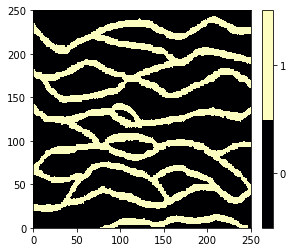

In [57]:
ti_strebelle = geone.img.readImageGslib('data/strebelle.gslib')
geone.imgplot.drawImage2D(ti_strebelle, categ=True, cmap='magma')

In [109]:
deesse_simulator = geostat.DeesseSimulator()
sim = deesse_simulator.run(seed=26)

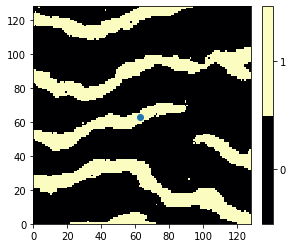

In [110]:
geone.imgplot.drawImage2D(sim, categ=True, cmap='magma')
plt.scatter([63],[63])

In [111]:
flow_solver = forward.FlowSolver()

In [112]:
k = flow_solver.img_to_k(sim.val[0,0,:,:])

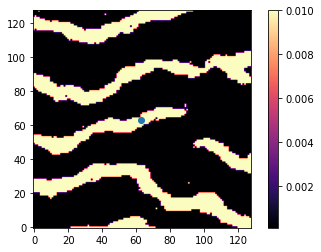

In [113]:
plt.imshow(k, cmap='magma', origin='lower')
plt.colorbar()
plt.scatter([63],[63])


In [114]:
heads = flow_solver.run(sim.val[0,0,:,:], 'test')

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing ims package ims_-1...
  writing model gwf_test...
    writing model name file...
    writing package dis...
    writing package npf...
    writing package chd_0...
INFORMATION: maxbound in ('gwf6', 'chd', 'dimensions') changed to 252 based on size of stress_period_data
    writing package ic...
    writing package wel...
INFORMATION: maxbound in ('gwf6', 'wel', 'dimensions') changed to 1 based on size of stress_period_data
    writing package sto...
    writing package oc...
FloPy is using the following  executable to run the model: /home/judap/bin/mf6beta
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.1.1 12/12/2019
                               ***DEVELOP MODE***

   MODFLOW 6 compiled Dec 15 2019 03:52:50 with IFORT compiler (ver. 18.0.3)

This software is preliminary or provisional

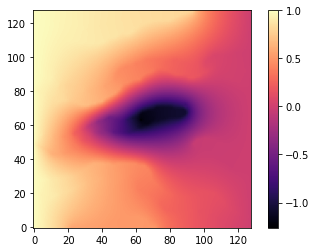

In [115]:
plt.imshow(heads[0,0,:,:], cmap='magma', origin='lower')
plt.colorbar()

In [116]:
locations = [ [ 16,  16], [ 32,  32], [ 48,  48], [ 80,  80],[ 96,  96], [112, 112], [ 16, 112], [ 32,  96], [ 48,  80], [ 63,  63], [ 80,  48], [ 96,  32], [112,  16]]
observations = [heads[0,0,loc[0], loc[1]] for loc in locations]
observations

[0.8419714137979798,
 0.6723589858937922,
 -0.1191521546547022,
 -0.3590038396981098,
 0.17927423449372965,
 0.14300228827144382,
 0.11281780947946062,
 0.06340846045637577,
 -0.3188286055908059,
 -1.263285449706966,
 0.5396933368144542,
 0.7825597860949327,
 0.9446886541480475]

In [117]:
measurements = 0.07*np.random.normal(size=len(observations)) + observations
measurements

array([ 0.89158034,  0.84550254, -0.14501171, -0.36723849,  0.11523723,
        0.1960391 ,  0.11089877, -0.09777393, -0.31272197, -1.23289254,
        0.59171852,  0.78778613,  0.86994152])